In [1]:
from transformers import pipeline

# Load the classification pipeline with the specified model
pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis")

# Classify a new sentence
sentence = "I love this product! It's amazing and works perfectly." 
result = pipe(sentence)

# Print the results
print(result)

/home/steve/Documents/FormationIA/ProjetMooc/Projet-MOOC/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


[{'label': 'Very Positive', 'score': 0.5922621488571167}]


In [1]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()

clientmongo = os.getenv("CLIENTMONGO")
database= os.getenv("DATABASE")
collectiondb = os.getenv("COLLECTIONDB")

client = MongoClient(clientmongo)
db = client[database]
collection = db[collectiondb]

rows = []

# Traitement en lot
batch_size = 1000
cursor = collection.find({}, no_cursor_timeout=True).batch_size(batch_size)

for doc in cursor:
    content = doc.get("content", {})
    rows.append({
        "_id": doc.get("_id"),
        "titre": content.get("title"),
        "titre_sujet": content.get("courseware_title"),
        "Nom_du_cours": content.get("course_id"),
        "contenu_message": content.get("body"),
        "username": content.get("username"),
        "created_at": content.get("created_at"),
    })


df = pd.DataFrame(rows)
df.head()

/home/maximilien/Documents/Formation DATA IA/Projet-MOOC/env/lib/python3.12/site-packages/pymongo/synchronous/collection.py:1945: UserWarning: use an explicit session with no_cursor_timeout=True otherwise the cursor may still timeout after 30 minutes, for more info see https://mongodb.com/docs/v4.4/reference/method/cursor.noCursorTimeout/#session-idle-timeout-overrides-nocursortimeout
  return Cursor(self, *args, **kwargs)


,_id,titre,titre_sujet,Nom_du_cours,contenu_message,username,created_at
0,52ef4b71ab137b00720007d4,Jeune Ingénieur,Entre nous / Presentez-vous,CNAM/01002/Trimestre_1_2014,Dans le cadre de mes études d'ingénieur j'ai é...,qb,2014-02-03T07:55:29Z
1,52ef4d79b4907d2e23000996,Appronfondir mes connaissances,Entre nous / Presentez-vous,CNAM/01002/Trimestre_1_2014,"Bonjour,\nje suis actuellement une formation d...",fidji,2014-02-03T08:04:09Z
2,52ef4f99344caaf903000158,Motivations d'une archiviste enseignante,Entre nous / Presentez-vous,CNAM/01002/Trimestre_1_2014,Bonjour à tous (et je crois que nous sommes no...,ambruleaux,2014-02-03T08:13:13Z
3,52ef50b5cfc81d7e4100090e,Ancien Manager et Patron,Entre nous / Presentez-vous,CNAM/01002/Trimestre_1_2014,"Bonjour, j'ai eu une expérience de Manager de ...",EricBouchet,2014-02-03T08:17:57Z
4,52ef565b4b4451380f0008b2,Apprendre,Semaine_1 / Definition,CNAM/01002/Trimestre_1_2014,Je retiens que le manager peut jouer plusieurs...,edwigedk,2014-02-03T08:42:03Z


/home/maximilien/Documents/Formation DATA IA/Projet-MOOC/env/lib/python3.12/site-packages/pymongo/synchronous/collection.py:1945: UserWarning: use an explicit session with no_cursor_timeout=True otherwise the cursor may still timeout after 30 minutes, for more info see https://mongodb.com/docs/v4.4/reference/method/cursor.noCursorTimeout/#session-idle-timeout-overrides-nocursortimeout
  return Cursor(self, *args, **kwargs)
Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (620 > 512). Running this sequence through the model will result in indexing errors


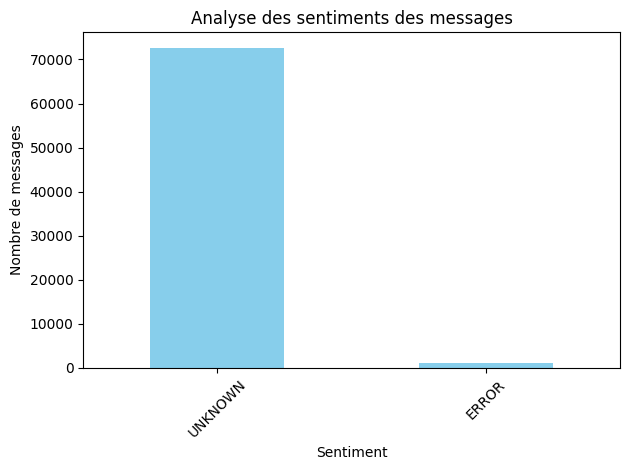

In [6]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
from transformers import pipeline
import matplotlib.pyplot as plt

load_dotenv()

clientmongo = os.getenv("CLIENTMONGO")
database= os.getenv("DATABASE")
collectiondb = os.getenv("COLLECTIONDB")

client = MongoClient(clientmongo)
db = client[database]
collection = db[collectiondb]

rows = []

# Traitement en lot
batch_size = 1000
cursor = collection.find({}, no_cursor_timeout=True).batch_size(batch_size)

for doc in cursor:
    content = doc.get("content", {})
    rows.append({
        "_id": doc.get("_id"),
        "titre": content.get("title"),
        "titre_sujet": content.get("courseware_title"),
        "Nom_du_cours": content.get("course_id"),
        "contenu_message": content.get("body"),
        "username": content.get("username"),
        "created_at": content.get("created_at"),
    })

df = pd.DataFrame(rows)
# df.head() # Vous pouvez commenter ou supprimer cette ligne si vous ne voulez pas voir les premières lignes du DataFrame

# Charger le pipeline
pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis", top_k=1)

# Fonction pour appliquer le pipeline et gérer les erreurs sans afficher chaque message
def get_sentiment_label(text):
    try:
        result = pipe(text)
        if result and isinstance(result, list) and isinstance(result[0], dict) and "label" in result[0]:
            return result[0]["label"]
        else:
            return "UNKNOWN" # Retourne "UNKNOWN" silencieusement
    except Exception as e:
        return "ERROR" # Retourne "ERROR" silencieusement

# Appliquer le pipeline à chaque message
df["sentiment"] = df["contenu_message"].apply(get_sentiment_label)

# Compter les sentiments
sentiment_counts = df["sentiment"].value_counts()

# Affichage d’un diagramme en barres
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title("Analyse des sentiments des messages")
plt.xlabel("Sentiment")
plt.ylabel("Nombre de messages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()